In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
Dat = pd.read_csv('https://covid-timeseries-timeenabled.s3.eu-central-1.amazonaws.com/CT_towns_latest.csv')

Income=pd.read_excel('ctincome2015_ct_income.xlsx')
Pop=pd.read_excel('2010_Census_population_and_Housing.xls')

In [3]:
Pop['Town']=Pop['Unnamed: 0']
Income['Town']=Income['Connecticut 2015 Income Statistics']

In [8]:
Fin=pd.merge(Dat,
                 Pop[['Unnamed: 1', 'Town']],
                 on='Town')
Fin=pd.merge(Fin,
                 Income[['Unnamed: 1', 'Town']],
                 on='Town')
Fin=Fin.rename({'Unnamed: 1_x': 'Pop', 'Unnamed: 1_y': 'Income'}, axis=1)
Fin['Dens']=Fin['Cases']/Fin['Pop']*10000
#Fin=Fin[Fin['Cases']>=100]
Fin.to_csv('CT_towns_density.csv', index=False)

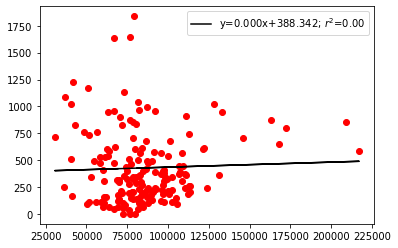

In [6]:
y=np.array(Fin['Dens']).flatten().astype(float)
x=np.array(Fin['Income']).flatten().astype(float)

slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(x,y)
plt.scatter(x,y, color='red')
plt.plot(x, intercept1 + slope1*x, 'k', label='y={:.3f}x+{:.3f}; $r^2$={:.2f}'.format(slope1,intercept1,(r_value1*r_value1)))
plt.legend()

plt.draw()
plt.savefig("Casedensity_income.png", dpi=300, bbox_inches='tight')

In [43]:
x=np.array(Fin['Income']).flatten()

In [5]:
Dat

,Unnamed: 0,Town,Cases,Date,Lat,Lon,Deaths,CaseRate,Daily_reported_cases,Daily_reported_cases_MA7
0,5649,Lisbon,6,2020-04-26,41.602766,-72.012261,0,141.0,0.0,0
1,5584,Bethany,22,2020-04-26,41.422964,-72.994187,1,402.0,1.0,1
2,5673,Newtown,99,2020-04-26,41.398095,-73.293169,5,356.0,1.0,4
3,5648,Ledyard,9,2020-04-26,41.431131,-72.020303,1,61.0,0.0,0
4,5662,Montville,59,2020-04-26,41.463900,-72.155570,0,315.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...
164,5731,West Haven,653,2020-04-26,41.272122,-72.967498,27,1190.0,12.0,28
165,5635,Groton,63,2020-04-26,41.347574,-72.031336,7,163.0,15.0,4
166,5700,Seymour,145,2020-04-26,41.385132,-73.083529,19,878.0,5.0,5
167,5675,North Branford,57,2020-04-26,41.363839,-72.784868,2,403.0,1.0,1
